In [2]:
import torch

In [6]:
x=torch.randn(2,3)
print(x.size())
print(x.dim())

torch.Size([2, 3])
2


In [8]:
import torch
torch.manual_seed(100)
x=torch.randn(2,3)
x[0,:]

tensor([ 0.3607, -0.2859, -0.3938])

In [9]:
x[:,-1]

tensor([-0.3938, -2.3134])

In [13]:
import torch
t=torch.randn(1,3)
print(t)
t1=torch.randn(3,1)
print(t1)
t2=torch.randn(1,3)
print(t2)
torch.addcdiv(t,0.1,t1,t2)

tensor([[ 0.5895, -0.3747, -1.2307]])
tensor([[ 1.5123],
        [-0.7597],
        [ 0.6139]])
tensor([[-0.9933, -1.1286, -0.8027]])


tensor([[ 0.4373, -0.5087, -1.4191],
        [ 0.6660, -0.3074, -1.1361],
        [ 0.5277, -0.4291, -1.3072]])

In [14]:
t.add_(2)

tensor([[2.5895, 1.6253, 0.7693]])

In [18]:
import torch
a=torch.linspace(0,10,6)
a=a.view((2,3))
b=a.sum(dim=0)
print(b.size())
b=a.sum(dim=0,keepdim=True)
print(b.size())

torch.Size([3])
torch.Size([1, 3])


In [20]:
import torch
a=torch.tensor([2,3])
b=torch.tensor([3,4])
print(torch.dot(a,b))
x=torch.randint(10,(2,3))
y=torch.randint(6,(3,4))
print(torch.mm(x,y))
x=torch.randint(10,(2,2,3))
y=torch.randint(6,(2,3,4))
torch.bmm(x,y)

tensor(18)
tensor([[ 6,  8,  4,  0],
        [26, 43, 24,  0]])


tensor([[[11, 37, 15, 14],
         [25, 83, 28, 38]],

        [[ 9, 20,  8, 14],
         [24, 64, 22, 46]]])

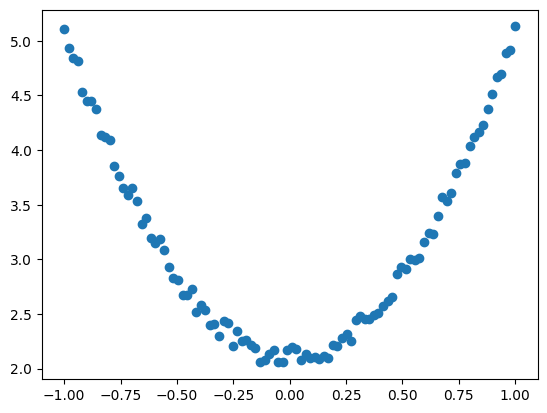

In [25]:
import numpy as np
from matplotlib import pyplot as plt
np.random.seed(100)
x=np.linspace(-1,1,100).reshape(100,1)
y=3*np.power(x,2)+2+0.2*np.random.rand(x.size).reshape(100,1)
plt.scatter(x,y)
plt.show()

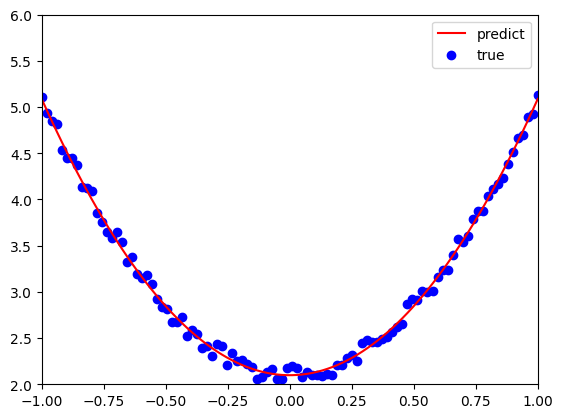

[[2.98914415]] [[2.09823199]]


In [28]:
w1=np.random.rand(1,1)
b1=np.random.rand(1,1)
lr=0.001
for i in range(800):
    y_pred=np.power(x,2)*w1+b1
    loss=0.5*(y_pred-y)**2
    loss=loss.sum()
    grad_w=np.sum((y_pred-y)*np.power(x,2))
    grad_b=np.sum((y_pred-y))
    w1-=lr*grad_w
    b1-=lr*grad_b
plt.plot(x,y_pred,'r-',label='predict')
plt.scatter(x,y,color='blue',marker='o',label='true')
plt.xlim(-1,1)
plt.ylim(2,6)
plt.legend()
plt.show()
print(w1,b1)

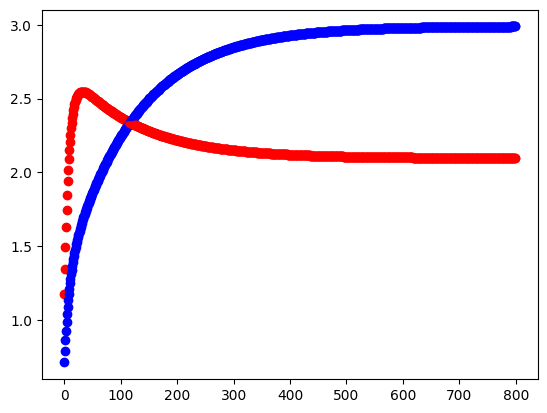

In [29]:
w1=np.random.rand(1,1)
b1=np.random.rand(1,1)
lr=0.001
for i in range(800):
    y_pred=np.power(x,2)*w1+b1
    loss=0.5*(y_pred-y)**2
    loss=loss.sum()
    grad_w=np.sum((y_pred-y)*np.power(x,2))
    grad_b=np.sum((y_pred-y))
    w1-=lr*grad_w
    b1-=lr*grad_b
    plt.scatter(i,w1,color='blue')
    plt.scatter(i,b1,color='red')
# plt.plot(x,y_pred,'r-',label='predict')
# plt.scatter(x,y,color='blue',marker='o',label='true')
# plt.xlim(-1,1)
# plt.ylim(2,6)
# plt.legend()
# plt.show()
# print(w1,b1)

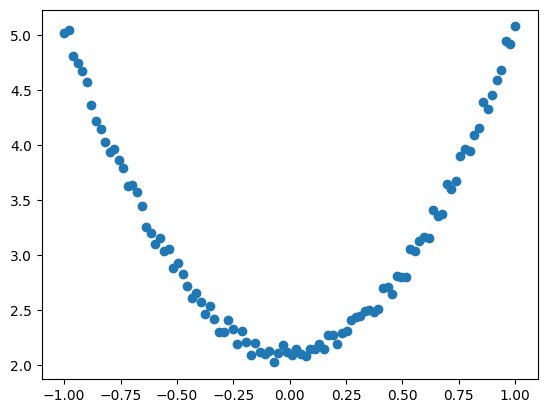

In [30]:
import torch as t
from matplotlib import pyplot as plt
t.manual_seed(100)
dtype=t.float
x=t.unsqueeze(torch.linspace(-1,1,100),dim=1)
y=3*x.pow(2)+2+0.2*torch.rand(x.size())
plt.scatter(x.numpy(),y.numpy())
plt.show()

In [31]:
w=t.randn(1,1,dtype=dtype,requires_grad=True)
b=t.zeros(1,1,dtype=dtype,requires_grad=True)

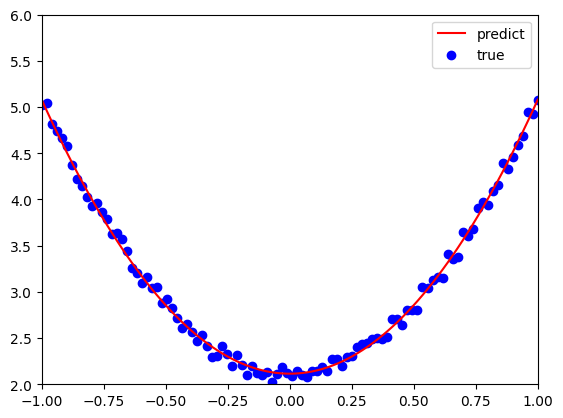

tensor([[2.9645]], requires_grad=True) tensor([[2.1146]], requires_grad=True)


In [32]:
lr=0.001
for ii in range(800):
    y_pred=x.pow(2).mm(w)+b
    loss=0.5*(y_pred-y)**2
    loss=loss.sum()
    loss.backward()
    with t.no_grad():
        w-=lr*w.grad
        b-=lr*b.grad
        w.grad.zero_()
        b.grad.zero_()
plt.plot(x.numpy(),y_pred.detach().numpy(),'r-',label='predict')
plt.scatter(x.numpy(),y.numpy(),color='blue',marker='o',label='true')
plt.xlim(-1,1)
plt.ylim(2,6)
plt.legend()
plt.show()
print(w,b)